In [1]:
import os
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import keras.utils as image
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, learning_curve, GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score, classification_report
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten, Activation
from keras import backend as K
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import model_to_dot
from keras.models import Sequential, model_from_json
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Dropout, Embedding, SpatialDropout1D, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D
%matplotlib inline
import random

In [2]:
from glob import glob
files = glob('C:\\Users\\PRERNA MISHRA\\OneDrive\\Important\\DL Project\\Data\\*\*\*')
files

['C:\\Users\\PRERNA MISHRA\\OneDrive\\Important\\DL Project\\Data\\8863\\0\\8863_idx5_x1001_y1001_class0.png',
 'C:\\Users\\PRERNA MISHRA\\OneDrive\\Important\\DL Project\\Data\\8863\\0\\8863_idx5_x1001_y1051_class0.png',
 'C:\\Users\\PRERNA MISHRA\\OneDrive\\Important\\DL Project\\Data\\8863\\0\\8863_idx5_x1001_y1101_class0.png',
 'C:\\Users\\PRERNA MISHRA\\OneDrive\\Important\\DL Project\\Data\\8863\\0\\8863_idx5_x1001_y1151_class0.png',
 'C:\\Users\\PRERNA MISHRA\\OneDrive\\Important\\DL Project\\Data\\8863\\0\\8863_idx5_x1001_y1201_class0.png',
 'C:\\Users\\PRERNA MISHRA\\OneDrive\\Important\\DL Project\\Data\\8863\\0\\8863_idx5_x1001_y1251_class0.png',
 'C:\\Users\\PRERNA MISHRA\\OneDrive\\Important\\DL Project\\Data\\8863\\0\\8863_idx5_x1001_y1301_class0.png',
 'C:\\Users\\PRERNA MISHRA\\OneDrive\\Important\\DL Project\\Data\\8863\\0\\8863_idx5_x1001_y1351_class0.png',
 'C:\\Users\\PRERNA MISHRA\\OneDrive\\Important\\DL Project\\Data\\8863\\0\\8863_idx5_x1001_y1401_class0.png',
 

In [3]:
len(files)

81141

In [4]:
import keras
from keras.preprocessing import image

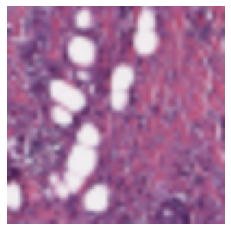

In [5]:
import cv2
image_name = "C:\\Users\\PRERNA MISHRA\\OneDrive\\Important\\DL Project\\Data\\8863\\0\\8863_idx5_x1001_y1001_class0.png" #Image to be used as query
def plotImage(image_location):
    image = cv2.imread(image_name)
    image = cv2.resize(image, (100,100))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off')
    return
plotImage(image_name)

In [6]:
import fnmatch
patternZero = '*class0.png'
patternOne = '*class1.png'
classZero = fnmatch.filter(files, patternZero) #filename pattern matching returns subset of list of names
classOne = fnmatch.filter(files, patternOne)
print("IDC(-)\n\n",classZero[0:5],'\n')
print("IDC(+)\n\n",classOne[0:5])

IDC(-)

 ['C:\\Users\\PRERNA MISHRA\\OneDrive\\Important\\DL Project\\Data\\8863\\0\\8863_idx5_x1001_y1001_class0.png', 'C:\\Users\\PRERNA MISHRA\\OneDrive\\Important\\DL Project\\Data\\8863\\0\\8863_idx5_x1001_y1051_class0.png', 'C:\\Users\\PRERNA MISHRA\\OneDrive\\Important\\DL Project\\Data\\8863\\0\\8863_idx5_x1001_y1101_class0.png', 'C:\\Users\\PRERNA MISHRA\\OneDrive\\Important\\DL Project\\Data\\8863\\0\\8863_idx5_x1001_y1151_class0.png', 'C:\\Users\\PRERNA MISHRA\\OneDrive\\Important\\DL Project\\Data\\8863\\0\\8863_idx5_x1001_y1201_class0.png'] 

IDC(+)

 ['C:\\Users\\PRERNA MISHRA\\OneDrive\\Important\\DL Project\\Data\\8863\\1\\8863_idx5_x1001_y1501_class1.png', 'C:\\Users\\PRERNA MISHRA\\OneDrive\\Important\\DL Project\\Data\\8863\\1\\8863_idx5_x1001_y1551_class1.png', 'C:\\Users\\PRERNA MISHRA\\OneDrive\\Important\\DL Project\\Data\\8863\\1\\8863_idx5_x1001_y1601_class1.png', 'C:\\Users\\PRERNA MISHRA\\OneDrive\\Important\\DL Project\\Data\\8863\\1\\8863_idx5_x1001_y801_cl

In [7]:
classes = []
for img in files:
    if img in classZero:
        classes.append(0)
    elif img in classOne:
        classes.append(1)

In [8]:
len(classes)

81141

In [9]:
df = pd.DataFrame()

In [10]:
df["images"]=files
df["labels"]=classes

In [11]:
df

,images,labels
0,C:\Users\PRERNA MISHRA\OneDrive\Important\DL P...,0
1,C:\Users\PRERNA MISHRA\OneDrive\Important\DL P...,0
2,C:\Users\PRERNA MISHRA\OneDrive\Important\DL P...,0
3,C:\Users\PRERNA MISHRA\OneDrive\Important\DL P...,0
4,C:\Users\PRERNA MISHRA\OneDrive\Important\DL P...,0
...,...,...
81136,C:\Users\PRERNA MISHRA\OneDrive\Important\DL P...,1
81137,C:\Users\PRERNA MISHRA\OneDrive\Important\DL P...,1
81138,C:\Users\PRERNA MISHRA\OneDrive\Important\DL P...,1
81139,C:\Users\PRERNA MISHRA\OneDrive\Important\DL P...,1


In [12]:
files[1]

'C:\\Users\\PRERNA MISHRA\\OneDrive\\Important\\DL Project\\Data\\8863\\0\\8863_idx5_x1001_y1051_class0.png'

In [13]:
x = []
y = []
Patient_id = []
for i in range(len(files)):
    x.append(files[i].split("_")[2])
    y.append(files[i].split("_")[3])
    Patient_id.append(files[i].split("\\")[7])


In [14]:
df['x']=x
df['y']=y
df['Patient_id']=Patient_id
df.head()

,images,labels,x,y,Patient_id
0,C:\Users\PRERNA MISHRA\OneDrive\Important\DL P...,0,x1001,y1001,8863
1,C:\Users\PRERNA MISHRA\OneDrive\Important\DL P...,0,x1001,y1051,8863
2,C:\Users\PRERNA MISHRA\OneDrive\Important\DL P...,0,x1001,y1101,8863
3,C:\Users\PRERNA MISHRA\OneDrive\Important\DL P...,0,x1001,y1151,8863
4,C:\Users\PRERNA MISHRA\OneDrive\Important\DL P...,0,x1001,y1201,8863


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81141 entries, 0 to 81140
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   images      81141 non-null  object
 1   labels      81141 non-null  int64 
 2   x           81141 non-null  object
 3   y           81141 non-null  object
 4   Patient_id  81141 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.1+ MB


In [16]:
df['x'] = df['x'].str.replace('x', '', regex=True)
df['y'] = df['y'].str.replace('y', '', regex=True)

df.head()

,images,labels,x,y,Patient_id
0,C:\Users\PRERNA MISHRA\OneDrive\Important\DL P...,0,1001,1001,8863
1,C:\Users\PRERNA MISHRA\OneDrive\Important\DL P...,0,1001,1051,8863
2,C:\Users\PRERNA MISHRA\OneDrive\Important\DL P...,0,1001,1101,8863
3,C:\Users\PRERNA MISHRA\OneDrive\Important\DL P...,0,1001,1151,8863
4,C:\Users\PRERNA MISHRA\OneDrive\Important\DL P...,0,1001,1201,8863


In [17]:
df['x'] = df['x'].astype(int)
df['y'] = df['y'].astype(int)

In [18]:
df.dtypes

images        object
labels         int64
x              int32
y              int32
Patient_id    object
dtype: object

In [19]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
sns.set()
sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[8,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

C:\Users\PRERNA MISHRA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PRERNA MISHRA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


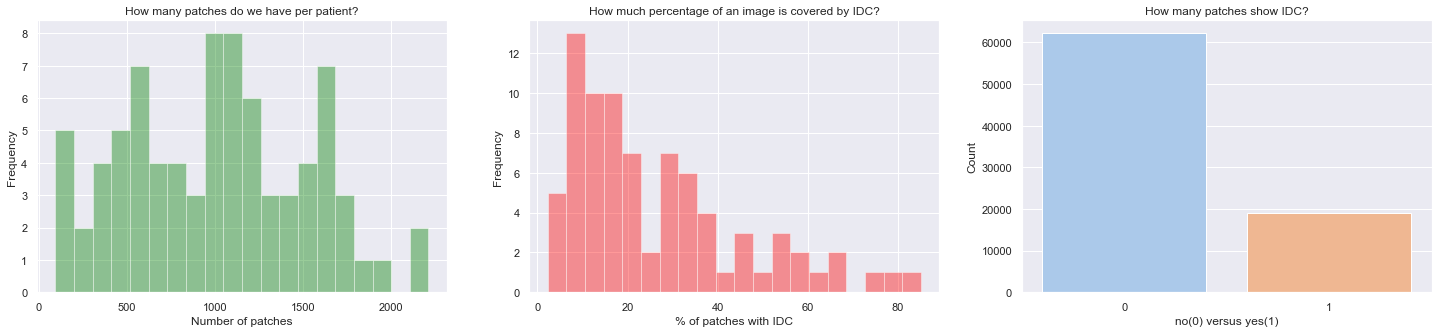

In [20]:
cancer_perc = df.groupby("Patient_id").labels.value_counts()/ df.groupby("Patient_id").labels.size()
cancer_perc = cancer_perc.unstack()

fig, ax = plt.subplots(1,3,figsize=(25,5))

# Plotting Frequency of Patches per Patient
sns.distplot(df.groupby("Patient_id").size(), ax=ax[0], color="green", kde=False, bins=20)
ax[0].set_xlabel("Number of patches")
ax[0].set_ylabel("Frequency")
ax[0].set_title("How many patches do we have per patient?")

# Plotting Percentage of an image that is covered by Invasive Ductile Carcinoma
sns.distplot(cancer_perc.loc[:, 1]*100, ax=ax[1], color="red", kde=False, bins=20)
ax[1].set_title("How much percentage of an image is covered by IDC?")
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("% of patches with IDC")

# Plotting number of patches that show IDC
sns.countplot(df.labels, palette='pastel', ax=ax[2]);
ax[2].set_ylabel("Count")
ax[2].set_xlabel("no(0) versus yes(1)")
ax[2].set_title("How many patches show IDC?");

In [21]:
positive_tissue = np.random.choice(df[df.labels==1].index.values, size=100, replace=False)
negative_tissue = np.random.choice(df[df.labels==0].index.values, size=100, replace=False)

In [22]:
n_rows = 5
n_cols = 5

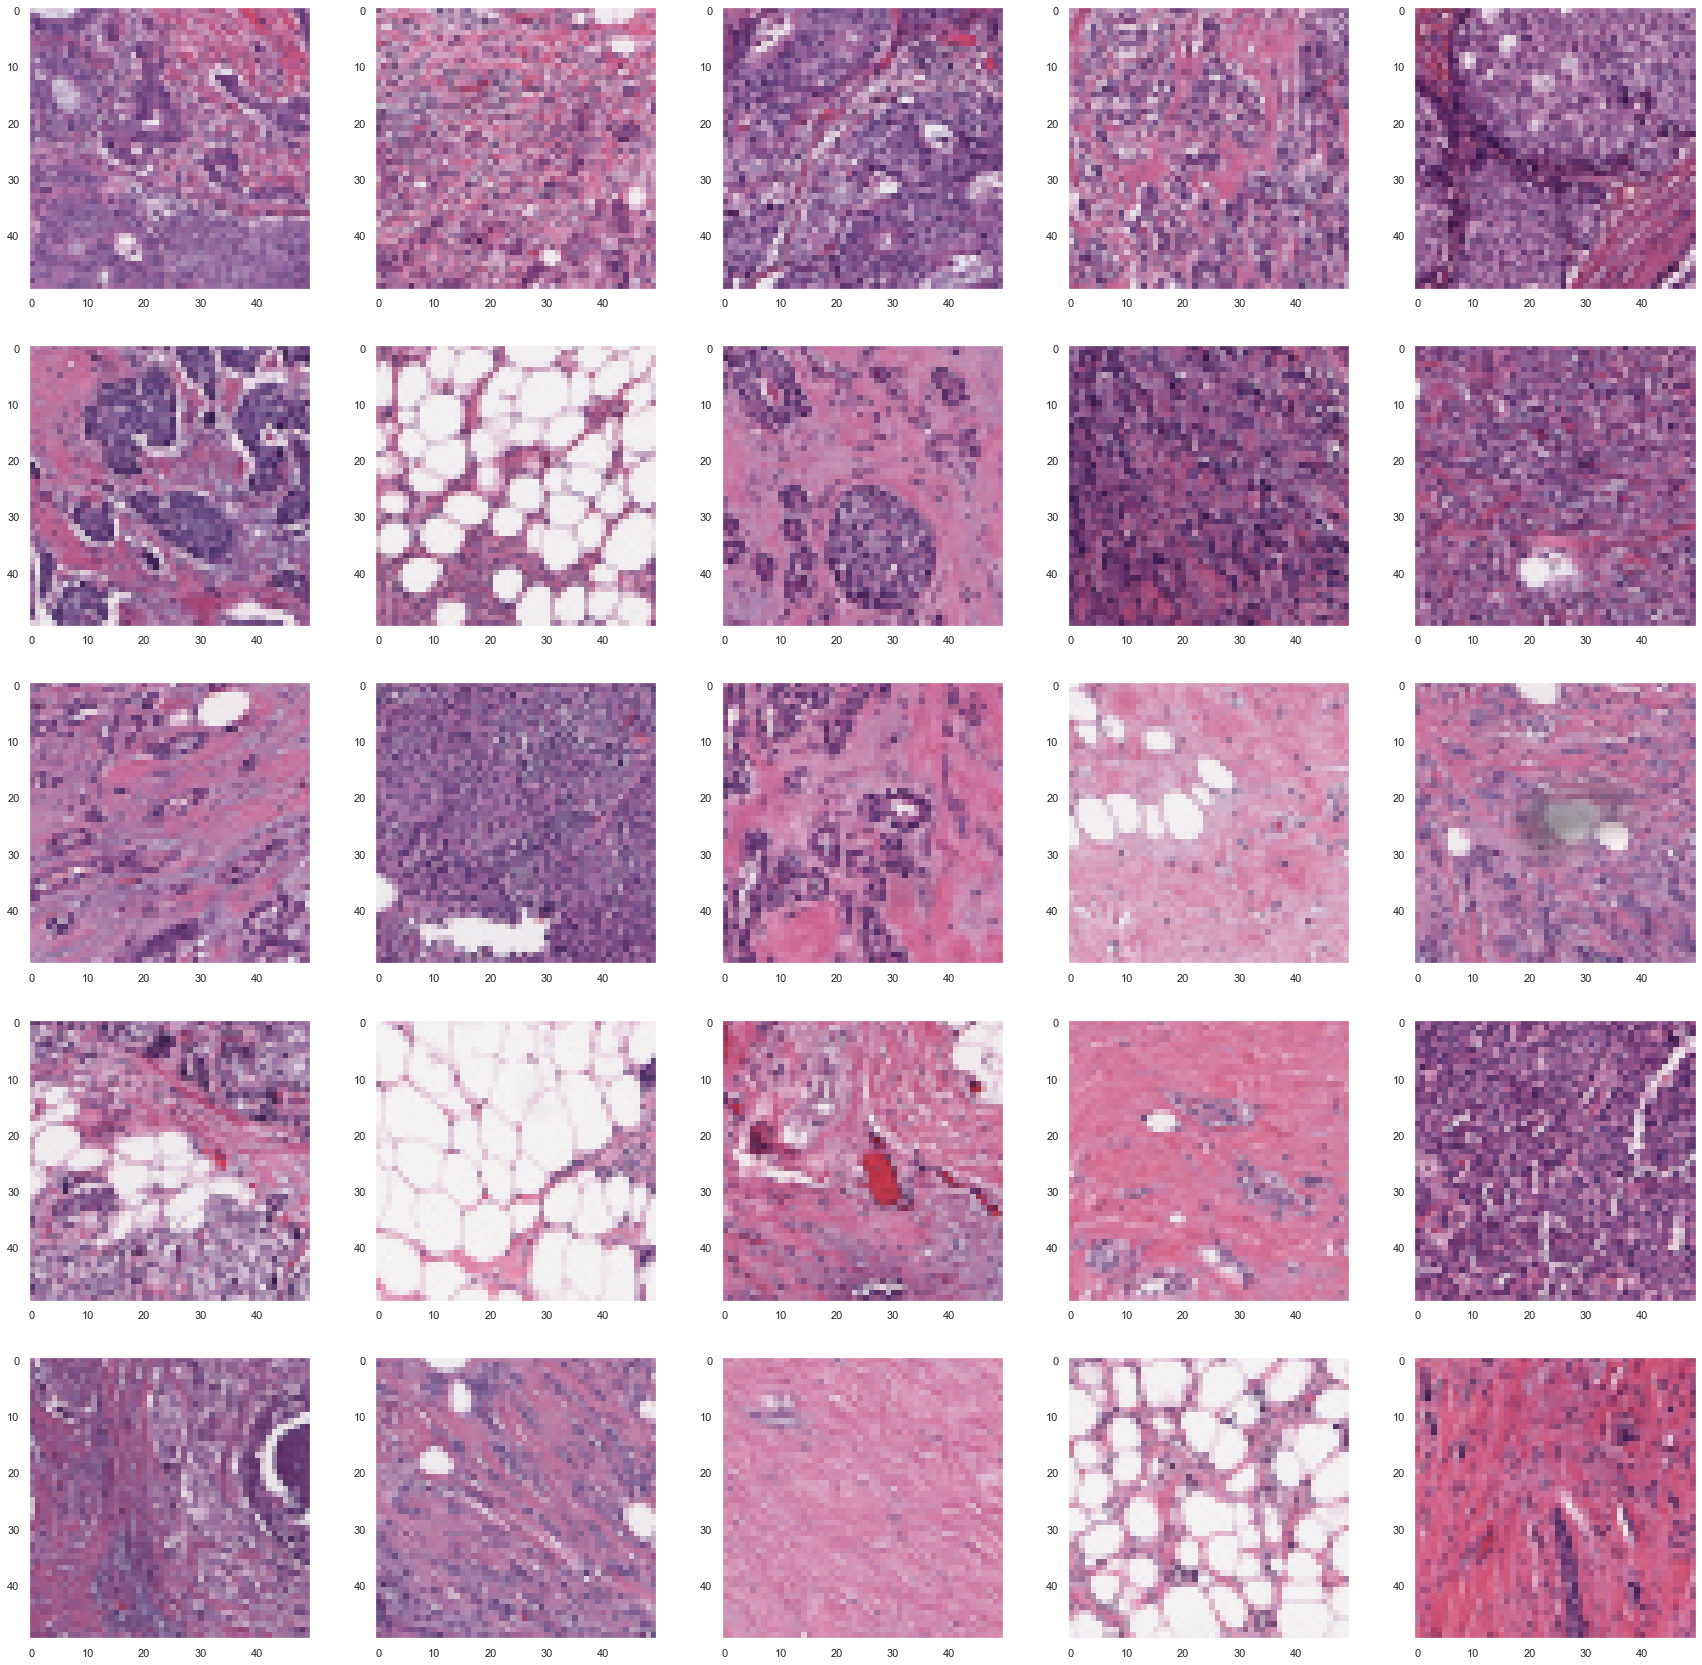

In [23]:
#Cancerous Patches
from skimage import io
fig,ax = plt.subplots(n_rows,n_cols,figsize = (30,30))

for row in range(n_rows):
    for col in range(n_cols):
        # below is a counter to cycle through the image indexes
        idx = positive_tissue[col + n_cols*row]
        img = io.imread(df.loc[idx, "images"])
        ax[row,col].imshow(img[:,:,:])
        ax[row,col].grid(False)

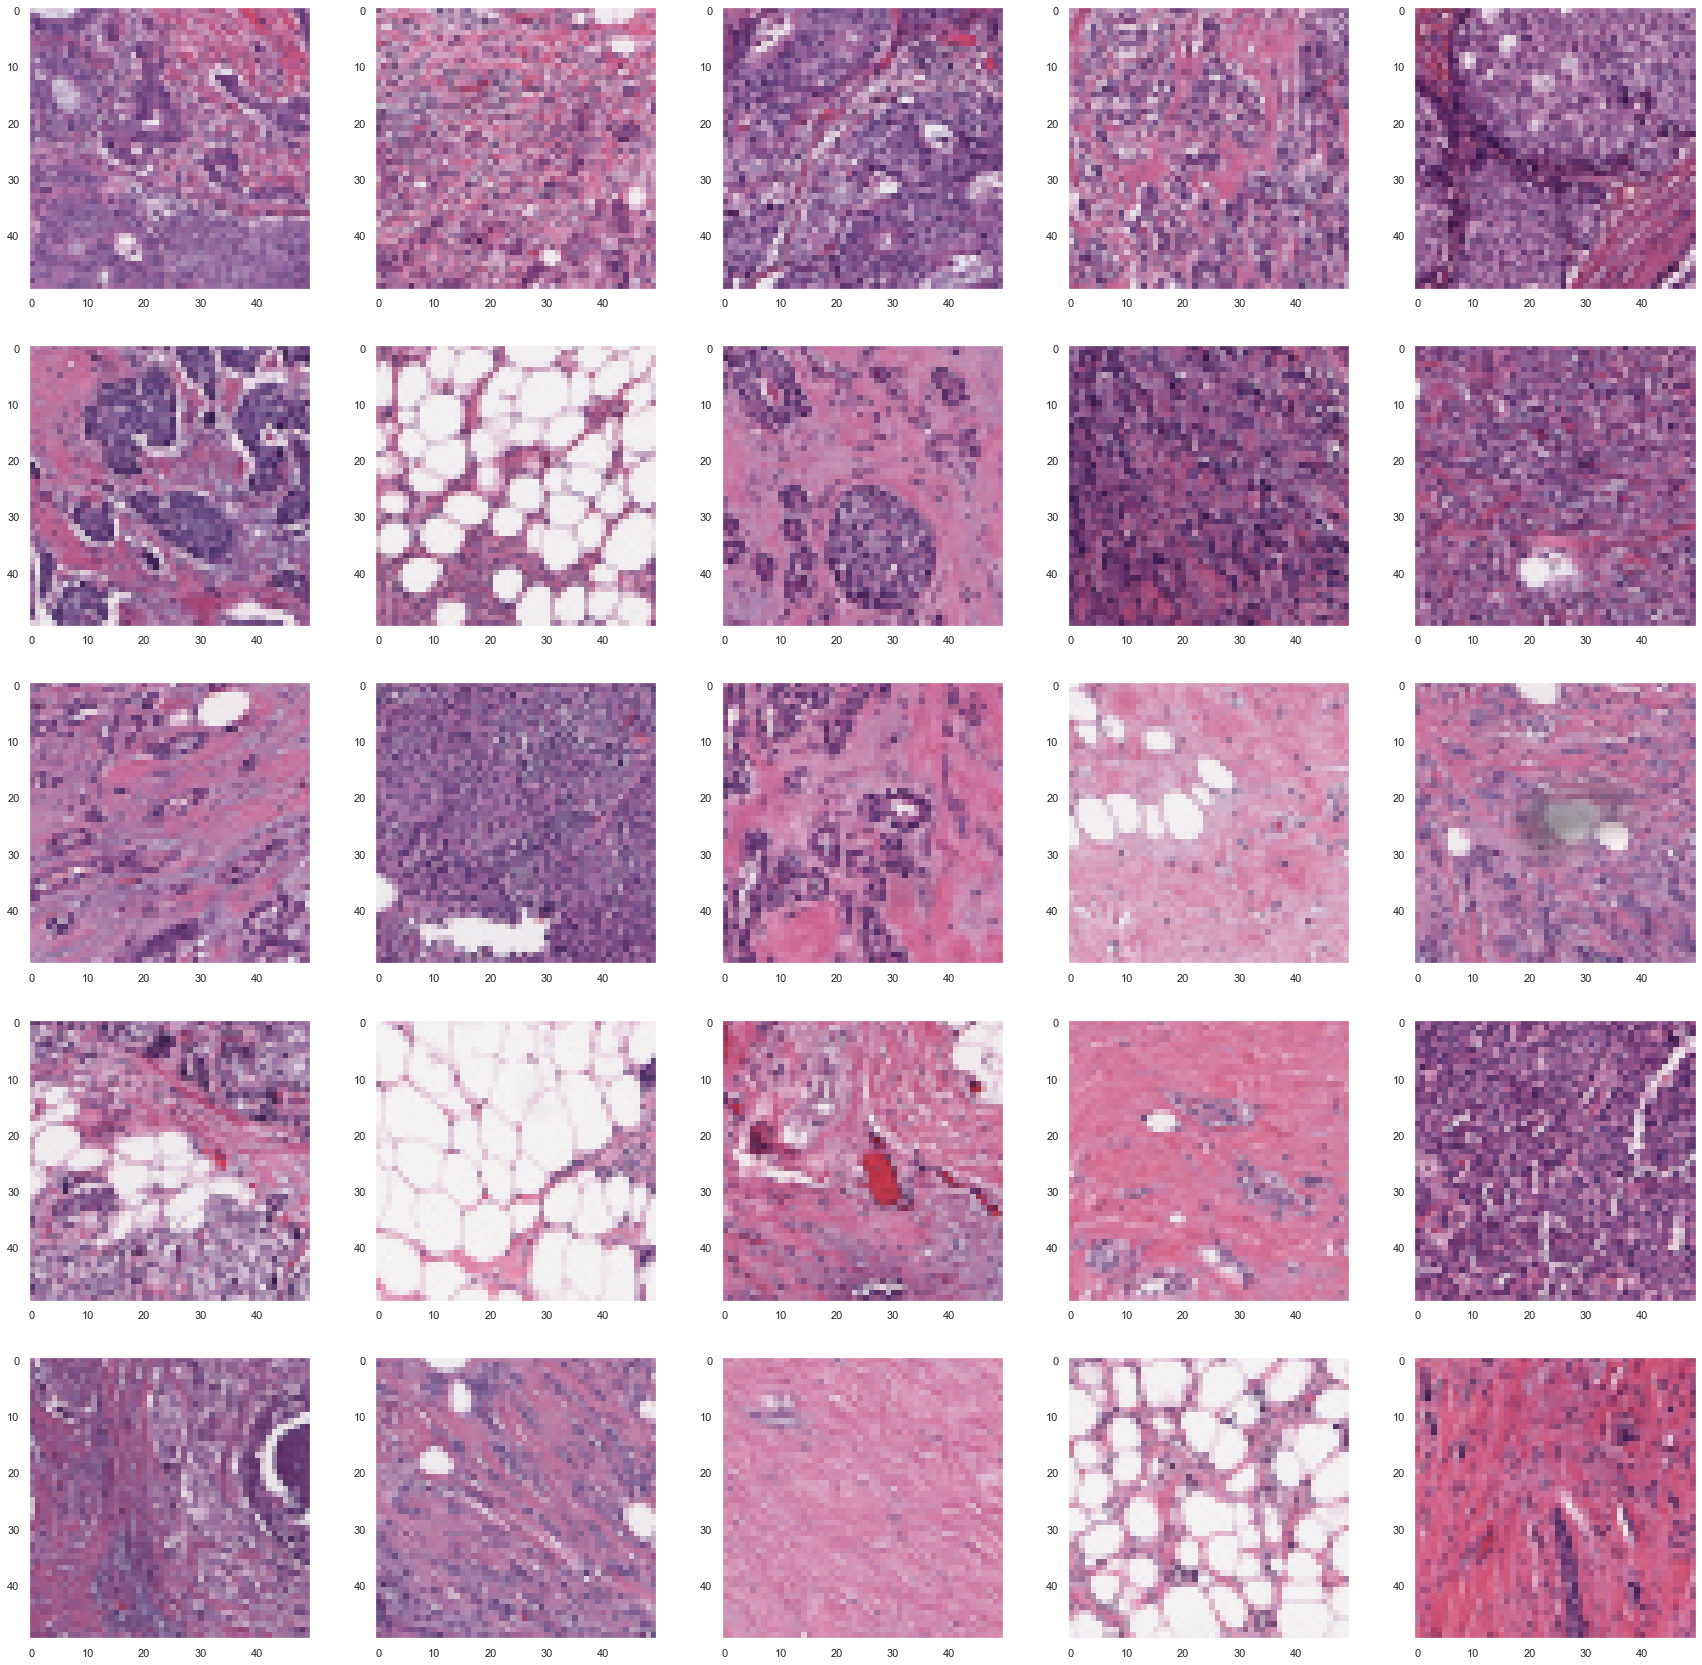

In [24]:
#Non Cancerous Patches
fig,ax = plt.subplots(n_rows,n_cols,figsize = (30,30))

for row in range(n_rows):
    for col in range(n_cols):
        # below is a counter to cycle through the image indexes
        idx = positive_tissue[col + n_cols*row]
        img = io.imread(df.loc[idx, "images"])
        ax[row,col].imshow(img[:,:,:])
        ax[row,col].grid(False)

In [25]:
#Visualizing the breast Tissues
def get_patient_df(patient_id):
    return df.loc[df['Patient_id']== patient_id,:]

In [26]:
n_rows = 5
n_cols = 3
n_imgs = n_rows*n_cols

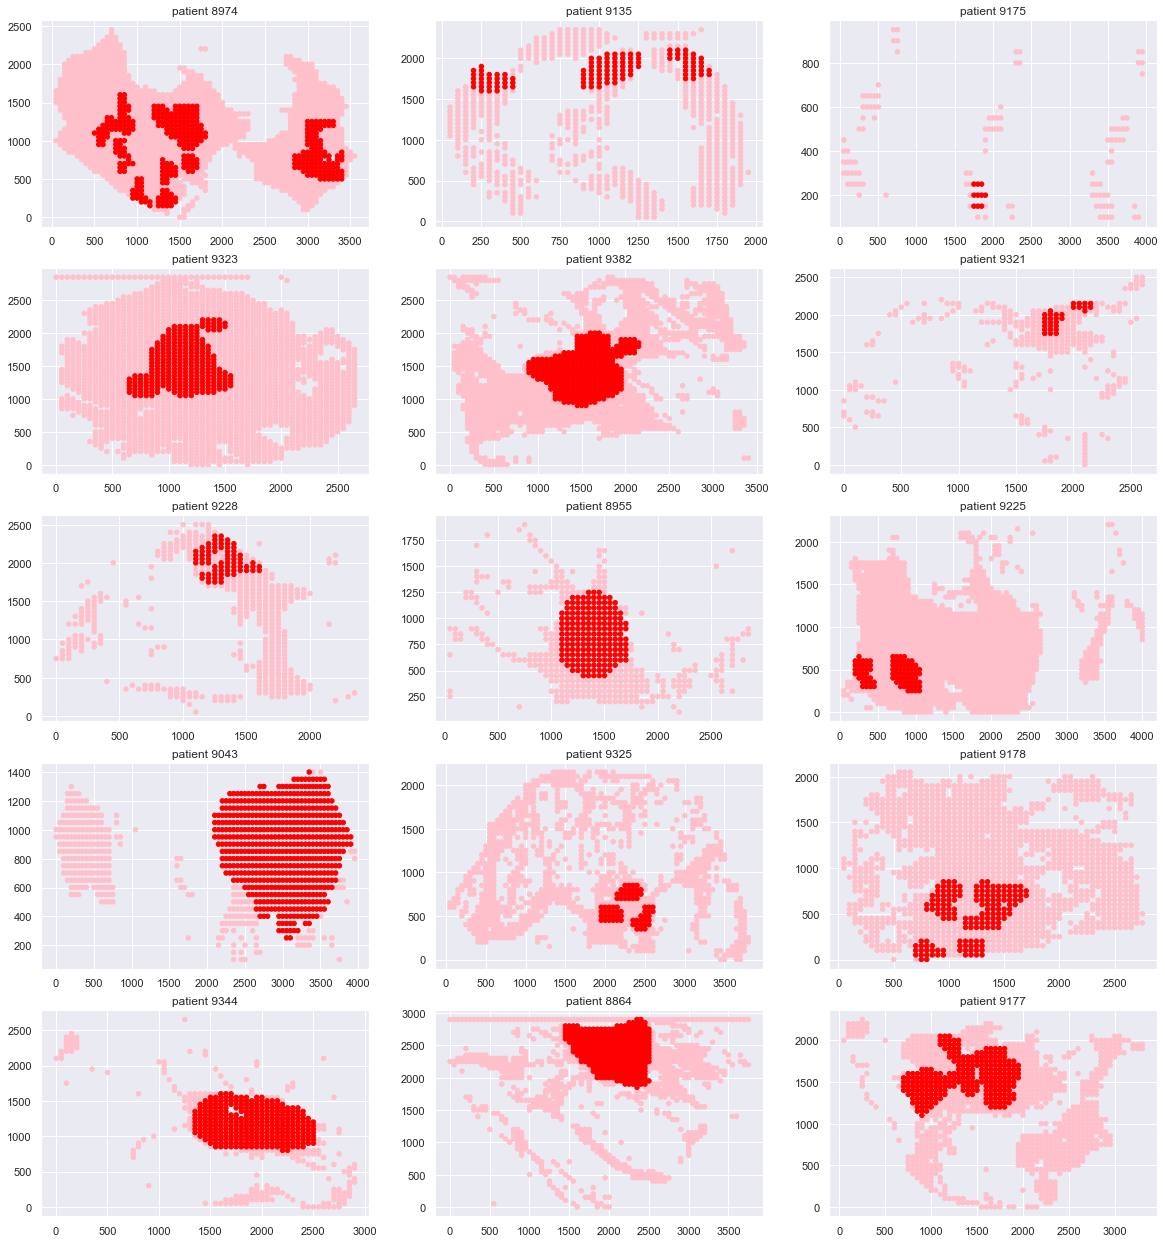

In [27]:
colors = ['pink', 'red']

fig, ax = plt.subplots(n_rows,n_cols,figsize=(20, 22))

patient_ids = np.random.choice( df.Patient_id.unique(), size=n_imgs, replace=False)

for row in range(n_rows):
    for col in range(n_cols):
        patient_id = patient_ids[col + n_cols*row]
        patient_df = get_patient_df(patient_id)
        
        ax[row,col].scatter(patient_df.x.values, \
                            patient_df.y.values, \
                            c=patient_df.labels.values,\
                            cmap=ListedColormap(colors), s=20)
        ax[row,col].set_title("patient " + patient_id)

In [28]:
#Repatching the Actual Breast Tissue Image

def visualise_breast_tissue(patient_id, data = df,pred = False, crop_dimension = [50,50]):
    plt.xticks([])
    plt.yticks([])
    p_df = get_patient_df(patient_id)
    max_coord = np.max((*p_df.x,*p_df.y))
    grid = 255*np.ones(shape = (max_coord + crop_dimension[0], max_coord + crop_dimension[1], 3)).astype(np.uint8)
    mask = 255*np.ones(shape = (max_coord + crop_dimension[0], max_coord + crop_dimension[1], 3)).astype(np.uint8)
    for x,y,labels,images in zip(p_df['x'],p_df['y'],p_df['labels'],p_df['images']):
        try:
            img = io.imread(images)
            grid[y:y+crop_dimension[1],x:x+crop_dimension[0]] = img
            if labels != 0:
                mask[y:y+crop_dimension[1],x:x+crop_dimension[0]] = [0,0,255]
        except: pass
    if pred == False:
        io.imshow(grid)
        img = grid
    else:
        alpha = 0.78
        img = (mask * (1.0 - alpha) + grid * alpha).astype('uint8')
        io.imshow(img)
    return img

In [29]:
n_rows = 5
n_cols = 3
n_imgs = n_rows*n_cols

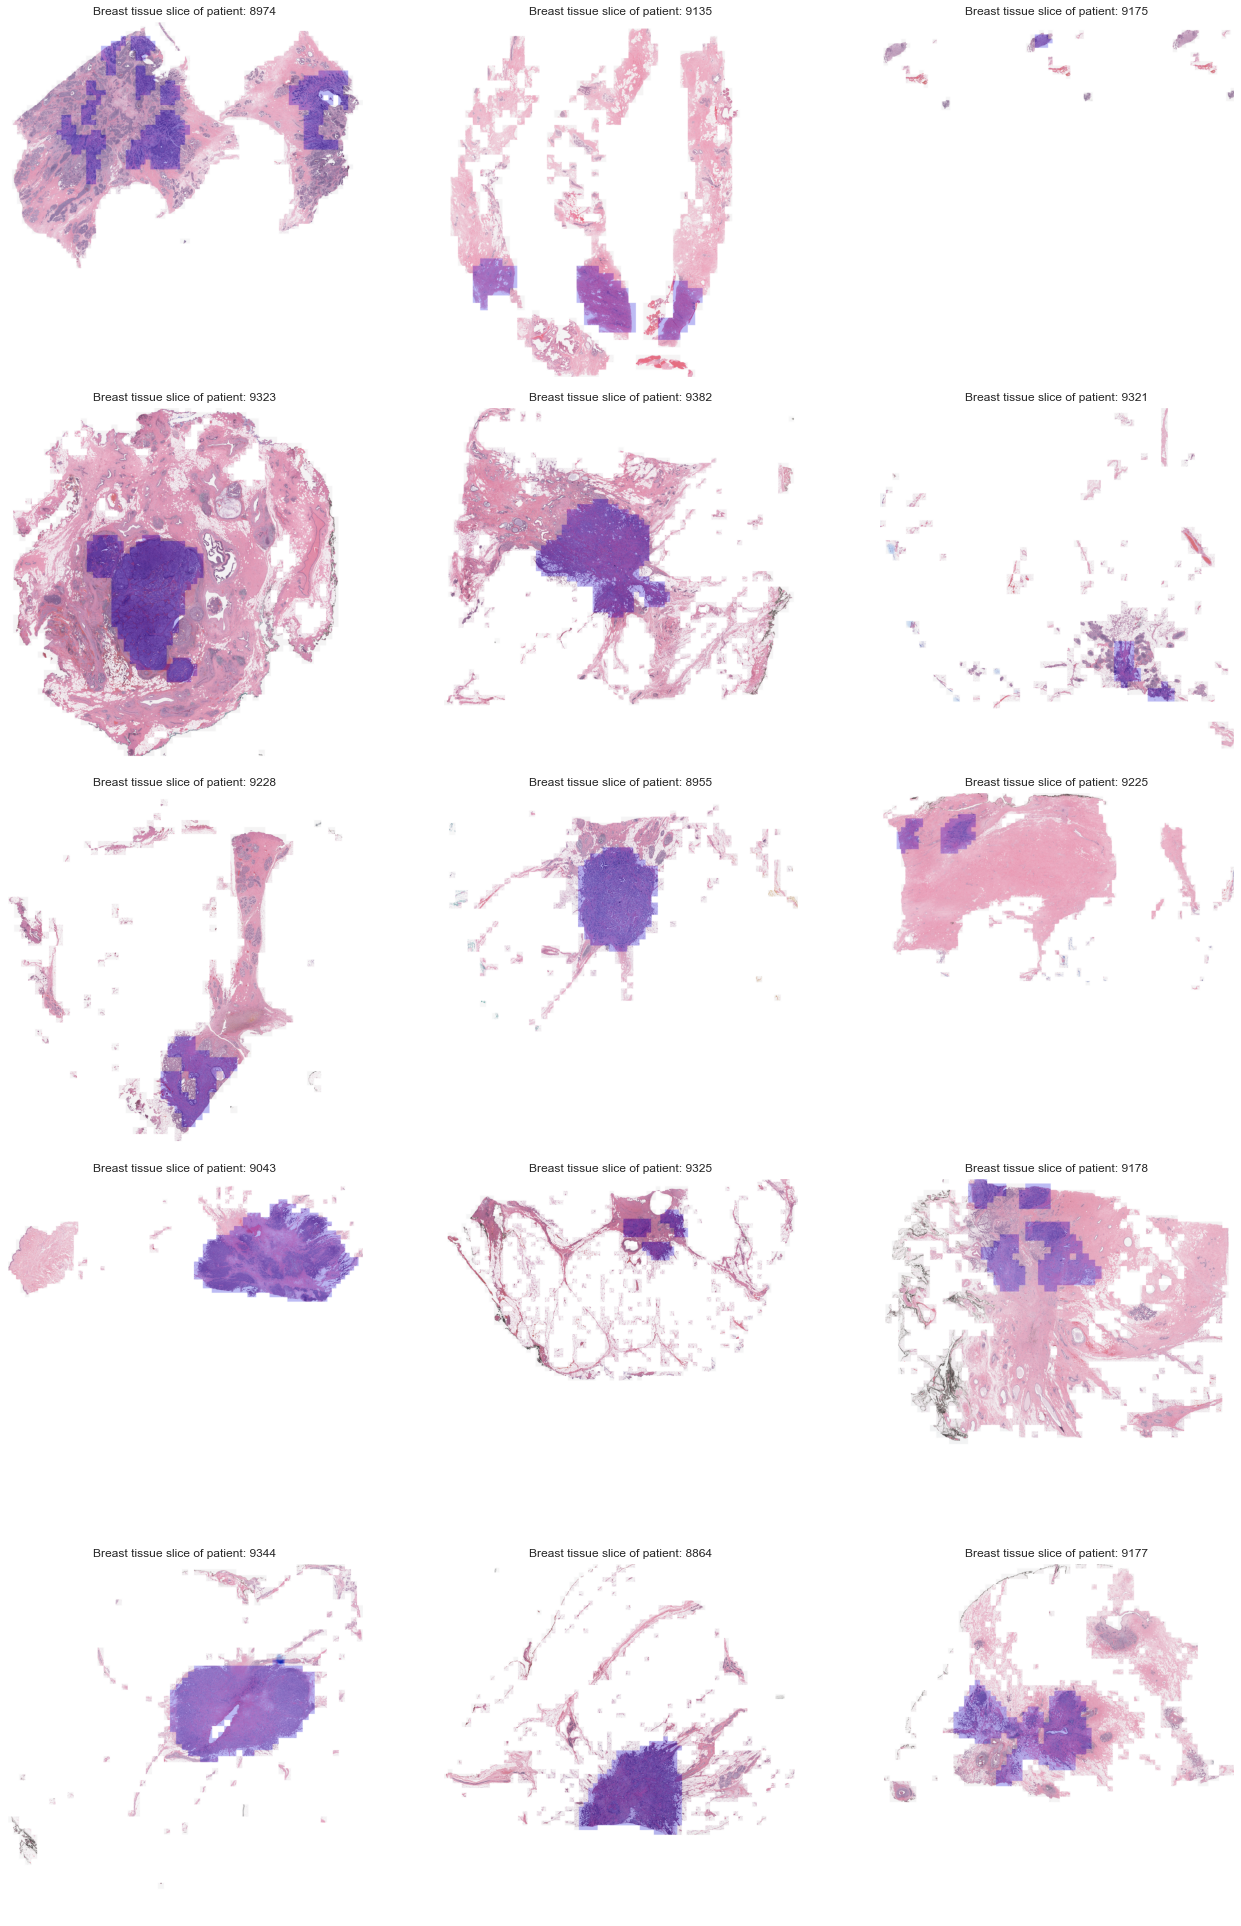

In [30]:
fig, ax = plt.subplots(n_rows,n_cols,figsize=(20, 27))

for row in range(n_rows):
    for col in range(n_cols):
        p_id = patient_ids[col + n_cols*row]
        
        img = visualise_breast_tissue(p_id, pred = True)
        ax[row,col].grid(False)
        ax[row,col].set_xticks([])
        ax[row,col].set_yticks([])
        ax[row,col].set_title("Breast tissue slice of patient: " + p_id)        
        ax[row,col].imshow(img)

In [31]:
N_IDC = df.loc[df['labels']==0, 'images'].tolist()
P_IDC = df.loc[df['labels']==1, 'images'].tolist()

In [32]:
non_num = len(N_IDC)
can_num = len(P_IDC)
        
total_img_num = non_num + can_num

In [33]:
non_img_arr = []
can_img_arr = []

for img in N_IDC:
        
    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    n_img_size = cv2.resize(n_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    non_img_arr.append([n_img_size, 0])
    
for img in P_IDC:
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    c_img_size = cv2.resize(c_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    can_img_arr.append([c_img_size, 1])

In [34]:
import random
from random import sample
non_img_arr_new = random.sample(non_img_arr, len(can_img_arr))
can_img_arr_new = random.sample(can_img_arr, len(can_img_arr))

In [35]:
import random
X = []
y = []

breast_img_arr = np.concatenate((non_img_arr_new, can_img_arr_new))
random.shuffle(breast_img_arr)

for feature, label in breast_img_arr:
    X.append(feature)
    y.append(label)
    
X = np.array(X)
y = np.array(y)

<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [36]:
from sklearn.model_selection import train_test_split
X=X/255.0

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 2)
Y_test = to_categorical(Y_test, num_classes = 2)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (30342, 50, 50, 3)
Testing Data Shape: (7586, 50, 50, 3)


In [40]:
from keras.layers import Input
from keras.models import Model

In [41]:
def def_model(inp_shape = (50,50,3)):
    inp = Input(inp_shape)
    m = Conv2D(32, (3,3), kernel_initializer='he_uniform', padding="same", activation='relu')(inp)
    m = MaxPooling2D(2)(m)
    m = BatchNormalization()(m)
    m = Conv2D(64, (3,3), kernel_initializer='he_uniform', padding="same", activation='relu')(m)
    m = MaxPooling2D(2)(m)
    m = BatchNormalization()(m)
    m = Conv2D(128, (3,3), kernel_initializer='he_uniform', padding="same", activation='relu')(m)
    m = MaxPooling2D(2)(m)
    m = BatchNormalization()(m)
    m = Conv2D(128, (3,3), kernel_initializer='he_uniform', padding="same", activation='relu')(m)
    m = MaxPooling2D(2)(m)
    m = Flatten()(m)
    m = Dense(128, activation = "relu")(m)
    out = Dense(2, activation = "softmax")(m)
    model = Model(inp, out)
    model.compile(optimizer = keras.optimizers.SGD(1e-3, momentum=0.9), loss="binary_crossentropy", metrics = ['acc'])
    return model

In [42]:
model = def_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 50, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 25, 25, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 64)       0     

In [43]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(patience= 8, restore_best_weights=True, monitor="val_acc")
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 25, batch_size=35, callbacks=[es])

Epoch 1/25
867/867 [==============================] - 141s 160ms/step - loss: 0.2663 - acc: 0.8910 - val_loss: 0.2577 - val_acc: 0.8947
Epoch 2/25
867/867 [==============================] - 98s 114ms/step - loss: 0.2310 - acc: 0.9039 - val_loss: 0.2370 - val_acc: 0.9054
Epoch 3/25
867/867 [==============================] - 103s 119ms/step - loss: 0.2135 - acc: 0.9135 - val_loss: 0.2431 - val_acc: 0.9044
Epoch 4/25
867/867 [==============================] - 118s 137ms/step - loss: 0.1915 - acc: 0.9258 - val_loss: 0.2279 - val_acc: 0.9067
Epoch 5/25
867/867 [==============================] - 100s 115ms/step - loss: 0.1699 - acc: 0.9357 - val_loss: 0.2097 - val_acc: 0.9222
Epoch 6/25
867/867 [==============================] - 102s 118ms/step - loss: 0.1463 - acc: 0.9461 - val_loss: 0.2162 - val_acc: 0.9197
Epoch 7/25
867/867 [==============================] - 98s 113ms/step - loss: 0.1230 - acc: 0.9571 - val_loss: 0.1868 - val_acc: 0.9337
Epoch 8/25
867/867 [==============================

In [44]:
model.save('model.hdf5')

In [45]:
loss,accuracy=model.evaluate(X_test,Y_test)

238/238 [==============================] - 11s 46ms/step - loss: 0.2046 - acc: 0.9508


In [48]:
model.metrics_names

['loss', 'acc']

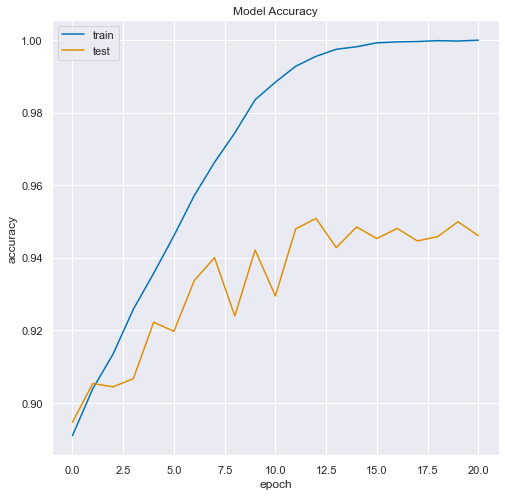

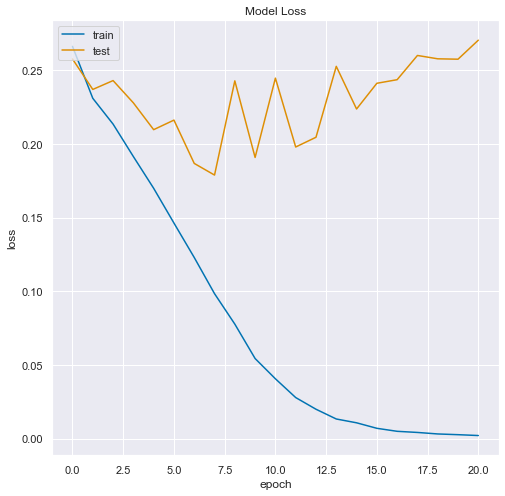

In [49]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()